In [4]:
#importlibrary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

In [5]:
#import dataset
dataset = pd.read_csv('trade1.csv')
print(dataset.head(20))

   Direction  Year        Date    Weekday Measure      Value  Cumulative  \
0    Exports  2015    1/1/2015   Thursday       $  104000000   104000000   
1    Exports  2015    2/1/2015     Friday       $   96000000   200000000   
2    Exports  2015    3/1/2015   Saturday       $   61000000   262000000   
3    Exports  2015    4/1/2015     Sunday       $   74000000   336000000   
4    Exports  2015    5/1/2015     Monday       $  105000000   442000000   
5    Exports  2015    6/1/2015    Tuesday       $   76000000   518000000   
6    Exports  2015    7/1/2015  Wednesday       $   59000000   577000000   
7    Exports  2015    8/1/2015   Thursday       $  111000000   688000000   
8    Exports  2015    9/1/2015     Friday       $   98000000   786000000   
9    Exports  2015   10/1/2015   Saturday       $   89000000   875000000   
10   Exports  2015   11/1/2015     Sunday       $  111000000   986000000   
11   Exports  2015   12/1/2015     Monday       $  161000000  1147000000   
12   Exports

In [6]:
#melihat info setiap variabel
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98507 entries, 0 to 98506
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Direction       98507 non-null  object
 1   Year            98507 non-null  int64 
 2   Date            98507 non-null  object
 3   Weekday         98507 non-null  object
 4   Measure         98507 non-null  object
 5   Value           98507 non-null  int64 
 6   Cumulative      98507 non-null  int64 
 7   Country         98507 non-null  object
 8   Commodity       98507 non-null  object
 9   Transport_Mode  98507 non-null  object
dtypes: int64(3), object(7)
memory usage: 7.5+ MB


In [7]:
#cleaning data
dataset = dataset.drop(["Direction","Weekday","Measure","Country","Commodity","Transport_Mode"],axis=1)
dataset.head(20)

,Year,Date,Value,Cumulative
0,2015,1/1/2015,104000000,104000000
1,2015,2/1/2015,96000000,200000000
2,2015,3/1/2015,61000000,262000000
3,2015,4/1/2015,74000000,336000000
4,2015,5/1/2015,105000000,442000000
5,2015,6/1/2015,76000000,518000000
6,2015,7/1/2015,59000000,577000000
7,2015,8/1/2015,111000000,688000000
8,2015,9/1/2015,98000000,786000000
9,2015,10/1/2015,89000000,875000000


In [27]:
#normalisasi

#mengubah tanggal dari object ke DateTime
dataset["Date"] = dataset["Date"].astype('datetime64[ns]')

#meihat apakah sudah berubah
dataset.dtypes

Year                   int64
Date          datetime64[ns]
Value                  int64
Cumulative             int64
dtype: object

In [16]:
#normalisasi
#grouping data

dataset_groupby_Year = dataset.groupby("Year")
dataset_groupby_Year["Year"].count()

Year
2015    16005
2016    16028
2017    15995
2018    16019
2019    16017
2020    16031
2021     2412
Name: Year, dtype: int64

In [23]:
#normalisasi
#grouping data 
#mencari rata-rata (mean,max,min)

dataset_groupby_Year[["Year","Value","Cumulative"]].mean()

,Year,Value,Cumulative
Year,,,
2015,2015.0,2.550866e+07,4.594115e+09
2016,2016.0,2.518743e+07,4.591304e+09
2017,2017.0,2.781532e+07,4.926312e+09
2018,2018.0,3.015929e+07,5.392358e+09
2019,2019.0,3.121065e+07,5.638055e+09
2020,2020.0,2.984876e+07,5.441778e+09
2021,2021.0,2.848019e+07,7.521480e+08


In [20]:
# selection
#sorting multiple column
#bisa di sorting sendiri" 
#sorting bisa pakai descending (ascending=False) / ascending (ascending=True)

dataset.sort_values(by=["Date","Value"])

,Direction,Year,Date,Weekday,Measure,Value,Cumulative,Country,Commodity,Transport_Mode
6914,Exports,2015,1/1/2015,Thursday,$,0,0,China,"Fish, crustaceans, and molluscs",All
9811,Exports,2015,1/1/2015,Thursday,Tonnes,0,0,China,Meat and edible offal,All
9098,Exports,2015,1/1/2015,Thursday,Tonnes,1000,1000,All,"Fish, crustaceans, and molluscs",All
10537,Exports,2015,1/1/2015,Thursday,Tonnes,1000,1000,United States,Meat and edible offal,All
8368,Exports,2015,1/1/2015,Thursday,Tonnes,2000,2000,All,Meat and edible offal,All
...,...,...,...,...,...,...,...,...,...,...
83244,Exports,2020,9/9/2020,Wednesday,$,79000000,31136000000,Total (excluding China),All,All
80316,Exports,2020,9/9/2020,Wednesday,$,87000000,41747000000,All,All,All
95618,Imports,2020,9/9/2020,Wednesday,$,151000000,28231000000,All,Non-food manufactured goods,All
93788,Imports,2020,9/9/2020,Wednesday,$,152000000,29494000000,All,All,Sea


In [32]:
# no redudance (kelebihan / data kembar)
print("?????")

?????


           Direction  Year      Date   Weekday Measure      Value Country  \
Cumulative                                                                  
104000000    Exports  2015  1/1/2015  Thursday       $  104000000     All   
200000000    Exports  2015  2/1/2015    Friday       $   96000000     All   
262000000    Exports  2015  3/1/2015  Saturday       $   61000000     All   
336000000    Exports  2015  4/1/2015    Sunday       $   74000000     All   
442000000    Exports  2015  5/1/2015    Monday       $  105000000     All   

           Commodity Transport_Mode  
Cumulative                           
104000000        All            All  
200000000        All            All  
262000000        All            All  
336000000        All            All  
442000000        All            All  


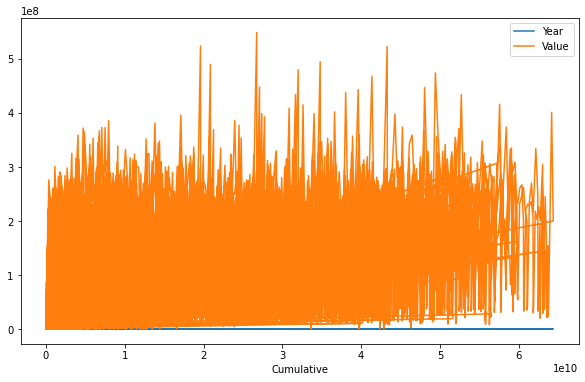

In [22]:
#Visualisasi
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('trade1.csv')

#menggunakan line
x = dataset[['Year','Value','Cumulative']]
x = dataset.set_index('Cumulative')
print(x.head(5))
#membuatline plot
x.plot (kind='line',figsize=(10,6))
plt.show()

In [12]:
#visualisasi scatter plot
fig, ax = plt.subplots(figsize=(10,6))
x_group = dataset.groupby('class')
colors = {'Year':'red','Value':'blue','Cumulative':'yellow'}
#membuat scatter plot
for name, group in dataset_group:
    group.plot(ax=ax, kind='scatter',x='Cumulative', y='Value', label=name, color=colors[name], s=50)
plt.title('Data Trade')
plt.xlabel('Value')
plt.ylabel('Cumulative')
plt.show()
print("\n")

NameError: name 'plt' is not defined